In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import load_model
from keras import optimizers
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import files
plt.style.use('ggplot')

In [0]:
train = pd.read_csv("train.csv").values
test  = pd.read_csv("test.csv").values

In [23]:
X = train[:,1:]
y = train[:,0]

print("X_train shape: {}".format(X.shape))
print("y_train shape: {}".format(y.shape))
print("X_test shape: {}".format(test.shape))

print("Classes: {}".format(np.unique(y)))

num_classes = len(np.unique(y))
print("Number of classes: {}".format(num_classes))


X_train shape: (42000, 784)
y_train shape: (42000,)
X_test shape: (28000, 784)
Classes: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


In [0]:
X_reshaped = X.reshape((X.shape[0],28,28,1))
X_test_reshaped = test.reshape((test.shape[0],28,28,1))

# normalize inputs from 0-255 to 0-1
X_reshaped = X_reshaped/ 255
X_test_reshaped = X_test_reshaped / 255

# one hot encode outputs
y_oh = np_utils.to_categorical(y)

num_classes = y_oh.shape[1]


In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y_oh, test_size=0.1, random_state=42)

**Objective**
This is a classification task which takes as input gray scale images of hand-written numbers and predicts which of 10 numbers it shows. 

The input images are 28 x 28 pixels (784 features) while the output variable gives the ground-truth label of the input images and takes values between 0 - 10. 

A classifier utilizing CNN will be trained on (X_train, y_train). (X_test, y_test) will be used as the validation set.

**Data preprocessing**
To apply CNNs, the data will be reshaped into 4D-arrays of (m, 28, 28, 1), where m denotes the number of samples in each data set. Furthermore, all  inputs will be normalized by 255 (the max intensity value) to minimize the effect of varying image intensity across images.

One-hot encoding will be applied to y labels

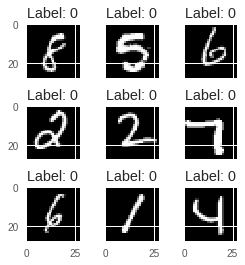

In [26]:
#visualize first 9 images in training set

fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(4,4))
fig.subplots_adjust(hspace=0.5)
index = 0

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X_train[index,:,:,0], cmap=plt.get_cmap('gray'))
        ax[i, j].set_title("Label: {}".format(np.argmax(y[index])))
        index +=1

plt.show()

**LeNet Architecture**

A model based on the LeNet CNN architecture was trained using Adam optimizer. 

In [0]:
def create_lenet():
  # LeNet

  seed = 7
  np.random.seed(seed)


  # build the model
  # create Lenet model. Use same padding for 1st layer so that output size remains at 28 x 28 similar to Lenet output layer 1
  lenet_model = Sequential()
  lenet_model.add(Conv2D(6, kernel_size = (5, 5), strides = (1,1), input_shape=(28,28,1), padding = "same", activation='tanh'))
  lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))

  lenet_model.add(Conv2D(16, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='tanh'))
  lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))

  lenet_model.add(Conv2D(120, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='tanh'))

  lenet_model.add(Flatten())
  lenet_model.add(Dense(84, activation='tanh'))
  lenet_model.add(Dense(num_classes, activation='softmax'))
  
  return lenet_model


In [28]:
lenet_model= create_lenet()

# Compile model
lenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
lenet_model_history = lenet_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, 
                                      batch_size=128, verbose=2, shuffle=True)
          

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 3s - loss: 0.4062 - acc: 0.8837 - val_loss: 0.2377 - val_acc: 0.9283
Epoch 2/30
 - 3s - loss: 0.1607 - acc: 0.9511 - val_loss: 0.1460 - val_acc: 0.9574
Epoch 3/30
 - 3s - loss: 0.1077 - acc: 0.9666 - val_loss: 0.1176 - val_acc: 0.9657
Epoch 4/30
 - 3s - loss: 0.0781 - acc: 0.9762 - val_loss: 0.0948 - val_acc: 0.9724
Epoch 5/30
 - 3s - loss: 0.0608 - acc: 0.9812 - val_loss: 0.0888 - val_acc: 0.9726
Epoch 6/30
 - 3s - loss: 0.0486 - acc: 0.9851 - val_loss: 0.0804 - val_acc: 0.9748
Epoch 7/30
 - 3s - loss: 0.0399 - acc: 0.9879 - val_loss: 0.0726 - val_acc: 0.9790
Epoch 8/30
 - 3s - loss: 0.0351 - acc: 0.9887 - val_loss: 0.0751 - val_acc: 0.9776
Epoch 9/30
 - 3s - loss: 0.0286 - acc: 0.9914 - val_loss: 0.0753 - val_acc: 0.9788
Epoch 10/30
 - 3s - loss: 0.0238 - acc: 0.9927 - val_loss: 0.0710 - val_acc: 0.9805
Epoch 11/30
 - 3s - loss: 0.0195 - acc: 0.9946 - val_loss: 0.0722 - val_acc: 0.9817
Epoch 12/30
 - 3s - loss: 0.0165 - a

In [0]:
# evaluates model by comparing training and validation accuracy and losses

def model_evaluate(history):

  f, (ax1,ax2) = plt.subplots(2,1,sharex=True, figsize = (8,8))
  f.subplots_adjust(hspace=0.3)
  
  ax1.plot(history.history['acc'], 'r', linewidth=1)
  ax1.plot(history.history['val_acc'], 'b', linewidth=1)

  # Plot legend and use the best location automatically: loc = 0.
  ax1.legend(["Train Acc.", "Validation Acc."], loc = 0)
  ax1.set_title("Training/Validation Acc. per Epoch")
  ax1.set_ylabel("Accuracy")
     
  text = "Final Training Accuracy:{:.2f}%\nFinal Val. Accuracy:{:.2f}%".format(history.history['acc'][-1]*100,
                                                                            history.history['val_acc'][-1]*100)
  ax1.text(0.5, 0.5,text, transform=ax1.transAxes, fontsize=12)
  
  ax2.plot(history.history['loss'], 'r', linewidth=1)
  ax2.plot(history.history['val_loss'], 'b', linewidth=1)
  
  # Plot legend and use the best location automatically: loc = 0.
  ax2.legend(["Train loss", "Validation loss"], loc = 0)
  ax2.set_title("Training/Validation loss per Epoch")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Loss")
  
  plt.show()
  
  

In [0]:
#save trained model and model history
def save_files(model, model_name, model_history):
  model.save(model_name+".h5")
  files.download(model_name+".h5")
  
  with open(model_name+".json", 'w') as f:
    json.dump(model_history.history, f)
  files.download(model_name+".json")

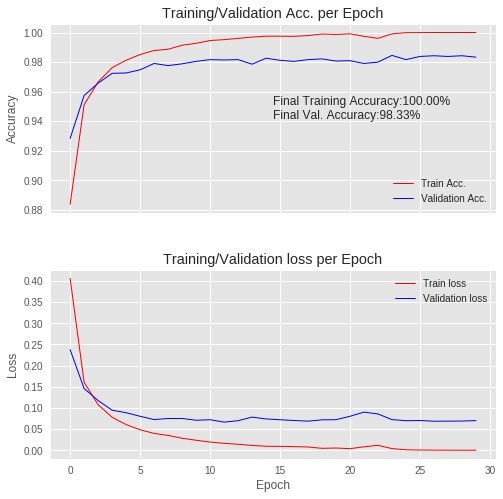

In [31]:
model_evaluate(lenet_model_history)
#save_files(lenet_model, "lenet_model", lenet_model_history)

For the LeNet model, batch sizes of 128 and 256 were tried but it was found that the results were similar. The result above shows the trained model using a batch size of 128.

The validation accuracy is 97.9%, 2% lower than the traiing accuracy.  This suggests that the model may be slightly overfitting on the training set. 

To mitigate the overfitting on the LeNet model, three options were explored:
1) Add dropout layers to the mode
2) Use data augmentation to increase the size of the training set
3) Explore different CNN architectures

**1) Add dropout layers and use ReLu Activation**

To minimize the overfitting, dropout layers were added to the Lenet architecture. ReLu activation was used instead of tanh

In [32]:
def create_lenet_dropout():

  seed = 7
  np.random.seed(seed)


  # build the model
  # create Lenet model. Use same padding for 1st layer so that output size remains at 28 x 28 similar to Lenet output layer 1
  lenet_model = Sequential()
  lenet_model.add(Conv2D(6, kernel_size = (5, 5), strides = (1,1), input_shape=(28,28,1), padding = "same", activation='relu'))
  lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))

  
  lenet_model.add(Conv2D(16, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='relu'))
  lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))
  lenet_model.add(Dropout(0.2))
  
  lenet_model.add(Conv2D(120, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='relu'))
  
  lenet_model.add(Flatten())
  lenet_model.add(Dropout(0.2))
  lenet_model.add(Dense(84, activation='relu'))
  lenet_model.add(Dense(num_classes, activation='softmax'))
  
  return lenet_model


lenet_dropout_model= create_lenet_dropout()

# Compile model
lenet_dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
lenet_dropout_model_history = lenet_dropout_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128, verbose=2, shuffle=True)
          


Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 3s - loss: 0.5252 - acc: 0.8392 - val_loss: 0.1772 - val_acc: 0.9450
Epoch 2/30
 - 3s - loss: 0.1647 - acc: 0.9500 - val_loss: 0.1148 - val_acc: 0.9650
Epoch 3/30
 - 3s - loss: 0.1179 - acc: 0.9635 - val_loss: 0.0852 - val_acc: 0.9764
Epoch 4/30
 - 3s - loss: 0.0982 - acc: 0.9685 - val_loss: 0.0734 - val_acc: 0.9757
Epoch 5/30
 - 3s - loss: 0.0831 - acc: 0.9740 - val_loss: 0.0634 - val_acc: 0.9807
Epoch 6/30
 - 3s - loss: 0.0732 - acc: 0.9771 - val_loss: 0.0591 - val_acc: 0.9807
Epoch 7/30
 - 3s - loss: 0.0672 - acc: 0.9790 - val_loss: 0.0560 - val_acc: 0.9814
Epoch 8/30
 - 3s - loss: 0.0610 - acc: 0.9806 - val_loss: 0.0524 - val_acc: 0.9850
Epoch 9/30
 - 3s - loss: 0.0571 - acc: 0.9823 - val_loss: 0.0511 - val_acc: 0.9852
Epoch 10/30
 - 3s - loss: 0.0539 - acc: 0.9826 - val_loss: 0.0456 - val_acc: 0.9857
Epoch 11/30
 - 3s - loss: 0.0496 - acc: 0.9846 - val_loss: 0.0472 - val_acc: 0.9845
Epoch 12/30
 - 3s - loss: 0.0462 - a

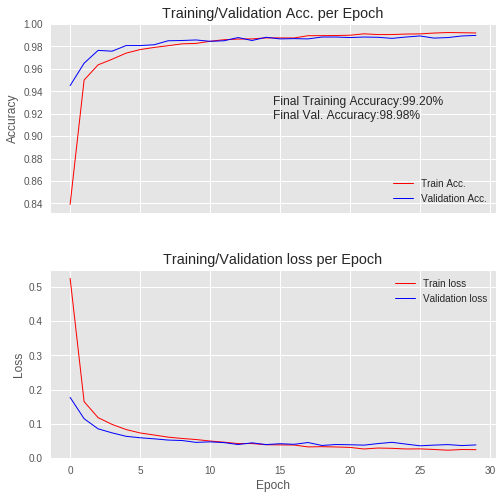

In [33]:
model_evaluate(lenet_dropout_model_history)
#save_files(lenet_dropout_model, "lenet_dropout_model", lenet_dropout_model_history)

With dropout, the validation accuracy improved to 98.8%, which suggests that this model generalizes better. 

**2) LeNet with data augmentation**
To reduce overfitting, Keras ImageDataGenerator was used to sample training data and augment them, effectively giving a large pool of training samples to train the base LeNet model

In [0]:
lenet_model_dataAug= create_lenet()

# Compile model
lenet_model_dataAug.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:
# create image generator to create augmented data from X_train
gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.05, shear_range=0.2,
                         height_shift_range=0.05, zoom_range=0.05)


train_generator = gen.flow(X_train, y_train, batch_size=128)

lenet_model_dataAug_history = lenet_model_dataAug.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=30, validation_data=(X_val, y_val), verbose=2)

Epoch 1/30
 - 18s - loss: 0.4416 - acc: 0.8679 - val_loss: 0.1535 - val_acc: 0.9526
Epoch 2/30
 - 17s - loss: 0.1487 - acc: 0.9534 - val_loss: 0.0929 - val_acc: 0.9695
Epoch 3/30
 - 18s - loss: 0.0948 - acc: 0.9710 - val_loss: 0.0681 - val_acc: 0.9788
Epoch 4/30
 - 18s - loss: 0.0741 - acc: 0.9772 - val_loss: 0.0675 - val_acc: 0.9793
Epoch 5/30
 - 17s - loss: 0.0639 - acc: 0.9798 - val_loss: 0.0667 - val_acc: 0.9805
Epoch 6/30
 - 18s - loss: 0.0541 - acc: 0.9827 - val_loss: 0.0599 - val_acc: 0.9831
Epoch 7/30
 - 17s - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0612 - val_acc: 0.9812
Epoch 8/30
 - 17s - loss: 0.0430 - acc: 0.9862 - val_loss: 0.0509 - val_acc: 0.9852
Epoch 9/30
 - 17s - loss: 0.0394 - acc: 0.9869 - val_loss: 0.0514 - val_acc: 0.9862
Epoch 10/30
 - 17s - loss: 0.0388 - acc: 0.9875 - val_loss: 0.0479 - val_acc: 0.9862
Epoch 11/30
 - 18s - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0413 - val_acc: 0.9874
Epoch 12/30
 - 17s - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0527 - val_a

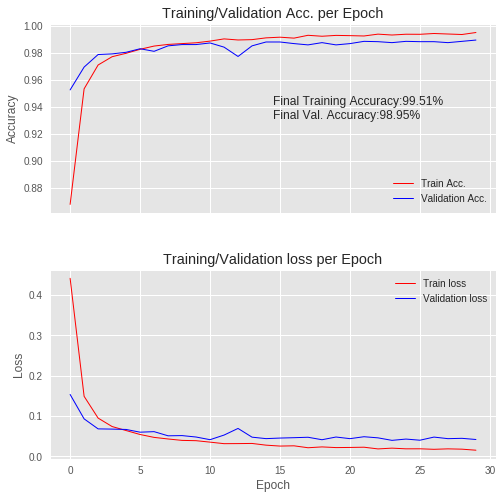

In [36]:
model_evaluate(lenet_model_dataAug_history)
#save_files(lenet_model_dataAug, "lenet_model_dataAug", lenet_model_dataAug_history)

With data augmentation (i.e. a larger training set), the base LeNet model does generalize better to the validation data,  with an improvement in validation accuracy to 98.8%, comparable to the model with dropout.



**3) Experiments with other CNN Architectures:**
To see if further improvements in prediction accuracy could be made, experiments were conducted using different model architectures based loosely on AlexNet and VGGNet

**a) CNN with 4 Conv Layers + 3 FCs** 

AlexNet has 5 Conv Layers + 3 FCs and takes in images of 227x227 pixels to give 1000 possible output classes. 

The inputs to the 2nd Conv layer in AlexNet are 27 x 27 pixels, similar in size to the MNIST data (28 x 28) and the MNIST data set is less complex (only 10 classes). A model architecture was therefore adapted loosely from AlexNet with the first Conv layer removed leaving 4 Conv Layers + 3 FCs 

Due to the relative simplicity of the MNIST data, the number of filters was also reduced to keep the number of parameters low without compromising prediction accuracy.  

In [0]:
def create_model_4Conv_3FC():
  seed = 7
  np.random.seed(seed)
  
  model = Sequential()
  model.add(Conv2D(12, kernel_size = (5, 5), strides = (1,1), input_shape=(28,28,1), padding="same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides = (2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(48, kernel_size = (3, 3), strides = (1,1), padding = "same", activation='relu'))
  model.add(Conv2D(48, kernel_size = (3, 3), strides = (1,1), padding = "same", activation='relu'))
  model.add(Conv2D(32, kernel_size = (3, 3), strides = (1,1), padding = "same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides = (2,2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))

  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))


  return model



In [38]:
model_4Conv_3FC = create_model_4Conv_3FC()

adam = optimizers.Adam(lr=1e-4)

model_4Conv_3FC.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

# vanilla model with original training set gave lower validation accuracy
#model_4Conv_3FC_history = model_4Conv_3FC.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=128, verbose=2, shuffle=True)          

#with data augmentation  
model_4Conv_3FC_history = model_4Conv_3FC.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=30, validation_data=(X_val, y_val), verbose=2)

Epoch 1/30
 - 20s - loss: 0.5890 - acc: 0.8066 - val_loss: 0.0997 - val_acc: 0.9729
Epoch 2/30
 - 19s - loss: 0.1494 - acc: 0.9532 - val_loss: 0.0653 - val_acc: 0.9800
Epoch 3/30
 - 19s - loss: 0.1061 - acc: 0.9666 - val_loss: 0.0509 - val_acc: 0.9826
Epoch 4/30
 - 19s - loss: 0.0855 - acc: 0.9735 - val_loss: 0.0426 - val_acc: 0.9855
Epoch 5/30
 - 19s - loss: 0.0700 - acc: 0.9784 - val_loss: 0.0337 - val_acc: 0.9886
Epoch 6/30
 - 19s - loss: 0.0620 - acc: 0.9802 - val_loss: 0.0259 - val_acc: 0.9907
Epoch 7/30
 - 19s - loss: 0.0571 - acc: 0.9819 - val_loss: 0.0254 - val_acc: 0.9905
Epoch 8/30
 - 19s - loss: 0.0492 - acc: 0.9848 - val_loss: 0.0275 - val_acc: 0.9905
Epoch 9/30
 - 19s - loss: 0.0448 - acc: 0.9859 - val_loss: 0.0260 - val_acc: 0.9933
Epoch 10/30
 - 19s - loss: 0.0415 - acc: 0.9868 - val_loss: 0.0223 - val_acc: 0.9921
Epoch 11/30
 - 19s - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0225 - val_acc: 0.9929
Epoch 12/30
 - 19s - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0262 - val_a

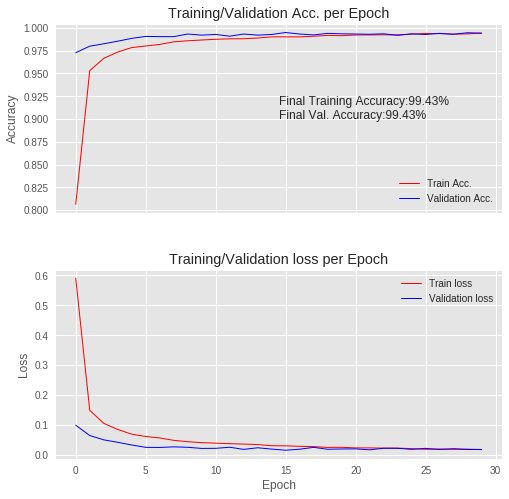

In [39]:
#save_files(model_4Conv_3FC, "model_4Conv_3FC", model_4Conv_3FC_history)

model_evaluate(model_4Conv_3FC_history)

The model with 4 Conv + 3 FC layers gives an appreciable improvement in validation accuracy to 99.36%.

In training this model, learning rate was lowered to 1e-4, as the default value of 1e-3 resulted in noisy loss curves for which it was difficult to determine whether the training had converged. Dropout values were also tuned and data augmentation was used to reduce overfitting.

**b) CNN with 6 Conv Layers + 3 FCs** 

Similar to the previous model, a scaled down version of the VGGnet architecture was used. The l VGGnet utilizes only 3x3 filters for conv layers and 2x2 pooling layers. In consideration of the complexity(or lack thereof) of the MNIST data set and the smaller image sizes, fewer convolutional layers were employed for this model.

In [0]:
def create_model_6Conv_3FC():
  seed = 7
  np.random.seed(seed)
  
  model = Sequential()
  model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), input_shape=(28,28,1), activation='relu', padding='same'))
  model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
  model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
  model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
  model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))


  return model



In [43]:
model_6Conv_3FC = create_model_6Conv_3FC()

adam = optimizers.Adam(lr=1e-4)

model_6Conv_3FC.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# vanilla model with original data set
#model_6Conv_3FC_history = model_6Conv_3FC.fit(X_train, y_train, validation_data=(X_val, y_val),
#                                                  epochs=30, batch_size=128, verbose=2, shuffle=True)

#data augmentation
model_6Conv_3FC_history = model_6Conv_3FC.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=30, validation_data=(X_val, y_val), verbose=2)         

Epoch 1/30
 - 22s - loss: 0.3464 - acc: 0.8913 - val_loss: 0.0727 - val_acc: 0.9764
Epoch 2/30
 - 20s - loss: 0.0984 - acc: 0.9692 - val_loss: 0.0491 - val_acc: 0.9843
Epoch 3/30
 - 21s - loss: 0.0664 - acc: 0.9788 - val_loss: 0.0355 - val_acc: 0.9893
Epoch 4/30
 - 21s - loss: 0.0535 - acc: 0.9833 - val_loss: 0.0371 - val_acc: 0.9874
Epoch 5/30
 - 21s - loss: 0.0451 - acc: 0.9856 - val_loss: 0.0342 - val_acc: 0.9895
Epoch 6/30
 - 21s - loss: 0.0397 - acc: 0.9871 - val_loss: 0.0295 - val_acc: 0.9914
Epoch 7/30
 - 21s - loss: 0.0357 - acc: 0.9884 - val_loss: 0.0375 - val_acc: 0.9900
Epoch 8/30
 - 20s - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0260 - val_acc: 0.9921
Epoch 9/30
 - 20s - loss: 0.0292 - acc: 0.9906 - val_loss: 0.0243 - val_acc: 0.9933
Epoch 10/30
 - 21s - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0253 - val_acc: 0.9912
Epoch 11/30
 - 20s - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0267 - val_acc: 0.9929
Epoch 12/30
 - 21s - loss: 0.0218 - acc: 0.9928 - val_loss: 0.0308 - val_a

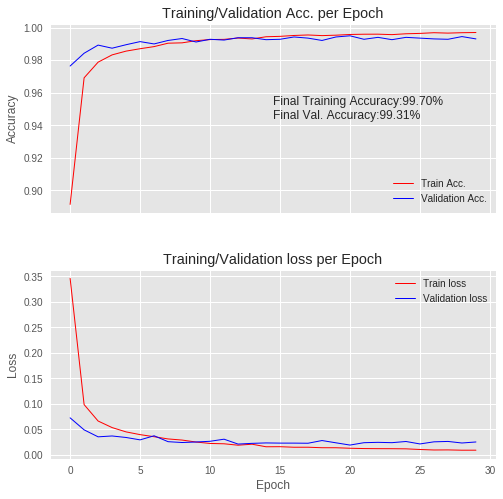

In [44]:
model_evaluate(model_6Conv_3FC_history)
#save_files(model_6Conv_3FC, "model_6Conv_3FC", model_6Conv_3FC_history)

The model with 6 Conv + 3 FC layers has a validation accuracy of 99.28%,  comparable to some of rhe earlier models. Similar to the CNN with 4Conv layers, the learning rate was reduced to 1e-4 to produce stabler loss curves to aid in confirmation that the model had been optimized. 

In [0]:
index = ["lenet_model","lenet_dropout_model","lenet_model_dataAug",
          "model_4Conv_3FC", "model_6Conv_3FC"]
model_history = [lenet_model_history.history,lenet_dropout_model_history.history,
                 lenet_model_dataAug_history.history,
                 model_4Conv_3FC_history.history, 
                 model_6Conv_3FC_history.history]
models = [lenet_model,lenet_dropout_model,lenet_model_dataAug,
          model_4Conv_3FC, model_6Conv_3FC]

trainingAcc = []
valAcc = []
trainingLoss = []
valLoss = []
numParams = []

for model, hist in zip(models, model_history):
  trainingAcc.append(round(hist['acc'][-1],4))
  valAcc.append(round(hist['val_acc'][-1],4))
  trainingLoss.append(round(hist['loss'][-1],4))
  valLoss.append(round(hist['val_loss'][-1],4))
  numParams.append(model.count_params())

df = pd.DataFrame(list(zip(trainingAcc, valAcc, trainingLoss, valLoss, numParams)), 
               columns =['trainingAcc', 'valAcc', 'trainingLoss', 'valLoss', 'numParams'], 
                 index = index) 
  


In [49]:
df

,trainingAcc,valAcc,trainingLoss,valLoss,numParams
lenet_model,1.0000,0.9833,0.0003,0.0702,61706
lenet_dropout_model,0.9920,0.9898,0.0243,0.0382,61706
lenet_model_dataAug,0.9951,0.9895,0.0152,0.0417,61706
model_4Conv_3FC,0.9943,0.9943,0.0182,0.0189,898354
model_6Conv_3FC,0.9970,0.9931,0.0093,0.0254,896882


In [0]:
predictions = model_4Conv_3FC.predict(X_test_reshaped)
predictions_classes = np.argmax(predictions, axis=1)
filename = "submission.csv"

predictions_df = pd.DataFrame({'ImageId': np.arange(1,len(predictions_classes)+1), 'Label': predictions_classes})
predictions_df.to_csv(filename, index=False)

In [0]:
files.download("submission.csv")
